#REGRESIÓN LINEAL SIMPLE CON PYTHON
El paquete statsmodels para regresión lineal

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [69]:
url_data = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/ads/Advertising.csv'
data = pd.read_csv(url_data)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [70]:
lm = smf.ols(formula = 'Sales~TV', data = data).fit()

In [71]:
lm

In [72]:
lm.params #el intercept sería alpha (ordenada en el origen) y TV sería el parámetro que acompaña a TV (beta)

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo sería Sales = 7.032594 + 0.047537 * TV

In [73]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [74]:
lm.rsquared

0.611875050850071

In [75]:
lm.rsquared_adj

0.6099148238341623

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        08:29:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

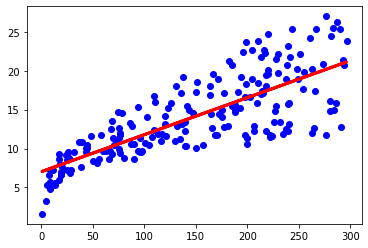

In [78]:
plt.plot(data['TV'], data['Sales'],'bo')
plt.plot(data['TV'], sales_pred,'r',linewidth=3)

In [79]:
data['sales_pred'] = lm.params.Intercept + lm.params.TV * data['TV']
data.head()

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [80]:
data['RSE'] = (data['Sales'] - data['sales_pred']) ** 2
data.head()

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970775,17.050503
1,44.5,39.3,45.1,10.4,9.147974,1.567569
2,17.2,45.9,69.3,9.3,7.850224,2.101851
3,151.5,41.3,58.5,18.5,14.234395,18.195390
4,180.8,10.8,58.4,12.9,15.627218,7.437719


In [81]:
SSD = sum(data['RSE'])
SSD

2102.530583131351

In [82]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650462

In [83]:
sales_m = np.mean(data['Sales'])
sales_m

14.022500000000003

In [84]:
RSE/sales_m

0.23238768897489473

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

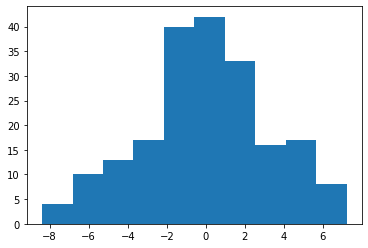

In [86]:
plt.hist(data['Sales'] - data['sales_pred'])

#REGRESIÓN LINEAL MÚLTIPLE
El paquete statsmodels para regresión lineal múltiple.

* Sales ~ TV
* Sales ~ Radio
* Sales ~ Newspaper 
* Sales ~ TV + Radio
* Sales ~ TV + Newspaper 
* Sales ~ Radio + Newspaper 
* Sales ~ TV + Radio + Newspaper  

In [88]:
# Añadir el newspaper al modelo que ya tenemos
lm2 = smf.ols(formula = 'Sales~TV+Newspaper', data = data).fit()

In [89]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [90]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [ ]:
# Ecuación del modelo: Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [93]:
lm2.rsquared

0.6458354938293271

In [94]:
lm2.rsquared_adj

0.6422399150864777

In [96]:
sales_pred_lm2 = lm2.predict(data[['TV', 'Newspaper']])
sales_pred_lm2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [98]:
SSD_lm2 = sum((data['Sales'] - sales_pred_lm2)**2)
SSD_lm2

1918.561811896827

In [99]:
RSE = np.sqrt(SSD_lm2/(len(data)-3)) #ojo que es -3 porque se están utilizando dos variables predictoras (n - k - 1)
RSE

3.120719860252885

In [100]:
RSE/np.mean(data['Sales'])

0.22255089037282116

In [101]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           3.95e-45
Time:                        09:42:25   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Añadimos la radio al modelo
lm3 = smf.ols(formula='Sales~TV+Radio', data = data).fit()

In [104]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [106]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [107]:
lm3.rsquared

0.8971942610828956

In [108]:
lm3.rsquared_adj

0.8961505479974428

In [110]:
sales_pred_lm3 = lm3.predict(data[['TV','Radio']])
sales_pred_lm3

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [111]:
SSD = sum((data['Sales'] - sales_pred_lm3)**2)
RSE = np.sqrt(SSD/(len(data) - 3))
RSE

1.6813609125080011

In [112]:
RSE/np.mean(data['Sales'])

0.1199045043685506

In [113]:
lm4 = smf.ols(formula = 'Sales~TV+Radio+Newspaper', data = data).fit()

In [115]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        09:52:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
lm.rsquared, lm2.rsquared, lm3.rsquared, lm4.rsquared

(0.611875050850071, 0.6458354938293271, 0.8971942610828956, 0.8972106381789522)

In [117]:
sales_pred_lm4 = lm4.predict(data[['TV', 'Radio', 'Newspaper']])
sales_pred_lm4

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [118]:
SSD = sum((data['Sales'] - sales_pred_lm4)**2)
RSE = np.sqrt(SSD/(len(data) - 3 - 1))
SSD, RSE

(556.8252629021869, 1.6855103734147436)

In [119]:
RSE/np.mean(data['Sales'])

0.12020041885646235

In [120]:
lm4.pvalues #ojo al pvalor de Newspaper, lo cual denota que no aporta nada al lado de los otros valores

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

#MULTICOLINEALIDAD


In [123]:
data[['TV', 'Radio','Newspaper','Sales']].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
# Se ve que existe una mayor colinealidad entre Newspaper y Radio: 
# Se modeliza entonces una variable a partir de las otras dos
# A partir del R2 se obtiene el factor de inflacción de la varianza (VIF) como:
# VIF = 1 / (1 - R2)

In [ ]:
# Si VIF es 1, no hay correlación
# Si VIF está entre 1 y 5 es que hay una correlación moderada
# Si VIF es mayor de 5 es que está altamente correlacionado y deben desaparecer del modelo

In [129]:
lm_TV = smf.ols(formula = 'TV~Radio+Newspaper', data = data).fit()
lm_Radio = smf.ols(formula = 'Radio~TV+Newspaper', data = data).fit()
lm_Newspaper = smf.ols(formula = 'Newspaper~TV+Radio', data = data).fit()

In [130]:
print('R2 de %s es %s. VIF es %s' % ('TV', lm_TV.rsquared, 1/(1-lm_TV.rsquared)))
print('R2 de %s es %s. VIF es %s' % ('Radio', lm_Radio.rsquared, 1/(1-lm_Radio.rsquared)))
print('R2 de %s es %s. VIF es %s' % ('Newspaper', lm_Newspaper.rsquared, 1/(1-lm_Newspaper.rsquared)))

R2 de TV es 0.004589623174239388. VIF es 1.00461078493965
R2 de Radio es 0.1266008772420567. VIF es 1.1449519171055353
R2 de Newspaper es 0.12678045656223502. VIF es 1.1451873787239288


In [132]:
# Estos resultados es que la TV no está correlacionada con nada (VIF = 1), pero las otras dos sí que tienen relación entre ellas
# Como tienen relación, lo mejor es descartar la que peor VIF tiene, por lo que descartaríamos Newspaper y nos quearíamos con
# TV y Radio, que justamente era el del lm3 que era el que mejor resultado tenía